# PRACTICAL 2 (WEEK 7): Correlation and Regression (and more plots)

By the end of this practical you should be able to:
* Aggregate data in R by factors
* Save data to a csv file
* Produce scatter plots from bivariate data, and be able to format them
* Carry out Pearson and Spearman correlations with R
* Generate a line fitting estimate from a regression model in R
* Complete a regression analysis

Before we get started, remember we need to import the packages we need. We did this in the previous practical and we need to do it each time we start a new session with R.

The packages we need are the same as last week and can be loaded with the command below. Type this into the code cell below to do this now:

`library(tidyverse)`

## Part 1: A recap from last week!

If you look in the week 7 folder you should see 2 csv data files. We are going to start with the file named <b>"TayAtBallathie.csv"</b> which contains measured water flowrates from the Tay river from 1960 to 2000. 

Load this file into R as you did last week using the cell below. <b>Make sure the object you load is called `tay` when you read it in.</b>

Try and remember how you did this last week. If you can't, refer back to last week’s notebook (you can have more than one notebook open at once in different browser tabs!). There is also a hint below if you need to refresh!


<b>HINT</b>: Remember the following commands from last week to help you:

* `list.files()` - Lists all files in the current directory
* `tay <- read_csv("TayAtBallathie.csv")`

### Exercise 1
Once you have read in the data, remember back to the commands from last week to view the raw data in different ways. Use the code cells below this one to write these commands and figure out how many **observations** are in the dataset? What about **variables**?

You can see the solution below if you get stuck and forget the commands.

HINT: the commands you might consider are simply typing the name of the data, `head()` and `dim()`   

Remember to put the name of the data in the brackets when the command requires it! 

To view the data object: `tay`

To view the first few rows of data: `head(tay)`

To view the nunber of rows and columna (i.e. the dimensions of the data): `dim(tay)`

**End of solution**

***
Remember about the importance of making sure the variable types are correct? We also need to change the **Month** and **Year** variables in the Tay data to make sure they are **factor** (or **fct** in R terms) variables. Let's do this now in the cells below (remember to look at last weeks notebook for how to do this but see hint below if you get stuck figuring out the command). Remember to view the data again to make sure the changes have been made.
    

**Hint:**

`tay$Month <- factor(tay$Month)`

`tay$Year <- factor(tay$Year)`


Let's also practice creating a histogram. There are 4 variables – which one makes sense for a histogram?

Can you remember how to do this from last week?

<b>HINT</b> Remember to think through what each part of the code is doing here. And how you can change the labels (e.g. changing after the equals sign for `main`, `ylab` and `xlab`) to whatever you want!

`hist(tay$Flowrate, main = "Flow Histogram", ylab="Flowrate", xlab="Frequency")`

# Part 2: Aggregating data in R

Aggregating data is a tool you will need in order to complete the feedback assignment, and is also a very valuable and important tool in statistical analysis in general. We are going to practice this on the tay data.

Firstly, what is aggregation? Let’s say you wanted yearly (annual) average flow rate (i.e. instead of daily average flow rate), aggregation is what you would do to achieve this. Aggregation is basically the process of summarising data by a grouping (or categorical variable). The command below calculates average flowrates per year:   

`TayAvg <- aggregate(Flowrate ~ Year, data=tay, FUN=mean)`

The code should be fairly self-explanatory:
1. We first specify the `aggregate()` function
2. In the brackets we specify firstly the **variable to be aggregated** followed by the `~` symbol and then the **grouping variable** which has to be a factor (categorical) type variable. 
3. We then specify the data to be used
4. The `FUN=` bit is where we specify **how** we want to aggregate. In this case we used `mean`. But we could also use the commands `sum`, `sd`, `min` and `max` here as well (which are summed total, standard deviation, minimum and maximum respectively).

The command will produce a new data object called `TayAvg`. Use the two code cells below to run this code and then view the new data object that it produces.


***
### Exercise 2
Have a go at producing a **new** data object this time using one of the other aggregation functions (e.g. `sum`, `sd`, `min` or `max`). Take a look at the resulting new dataset as well once you have run the command.

HINT: You'll need the `aggregate()` command here!

To aggregate by minimum values: `TayMin<- aggregate(Flowrate ~ Year, data=tay, FUN=min)`

By maximum values: `TayMax<- aggregate(Flowrate ~ Year, data=tay, FUN=max)` 

By Standard deviation: `TaySd<- aggregate(Flowrate ~ Year, data=tay, FUN=sd)`

By sum of the values: `TaySum<- aggregate(Flowrate ~ Year, data=tay, FUN=sum)`

**End of Solution**

***
We are going to be using the new `TayAvg` dataset for next week so we need to save it. We will save it as a `csv` file like all of the other files we have been using. The command to do this is pretty straightforward `write_csv()`:

1. In the brackets we first the name of the data object we wish to save (e.g. `TayAvg`) 
2. Then a comma, followed by the name of the new file we wish to create (e.g. `TayAvg.csv`). 

The full command looks like this:

`write_csv(TayAvg, "TayAvg.csv")`

This will save it in the current working directory, but it might be better to save it in your home directory. To do this all we need to do is add the **path** to the filename. In noteable you specify your home directory with `~/` before the filename. If you were working on your own computer you would include the full path e.g. "C:\Documents\Work etc".

`write_csv(TayAvg, "~/TayAvg.csv")`

Run the above code in the cell below to save the new file in your home directory. Once it is run you an check the home directory in the noteable home page to see that the file has appeared. 

## Part 2: Scatter Plots

Now we are going to get stuck into some actual analysis using the **TobaccoDeprivation.csv** datafile which is also in your week 7 folder. This data contains geographical information on levels of deprivation and numbers of shops and retailers selling tobacco products. We are going to use this data to answer the following research question:

**Do more deprived areas of Scotland have greater access to tobbaco products?**

The analysis we conduct will be very similar to the one completed in this paper: https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-015-2321-1

For more context about **why** this analysis is important, have a look at the paper above!

As usual, the first thing we have to do is read the data. Do this below with the `read_csv()` command and assign it to a data object called `TobaccoDeprivation`. Use the cells below to read in the data and inspect it using the usual commands (e.g. typing the name of the data object, `dim()` and `head()`). 

HINT: `TobaccoDeprivation <- read_csv("TobaccoDeprivation.csv")`

Looking at the data we can see that each row corresponds to something called a "datazone". These are the smallest geographical units at which data will be released to the public in Scotland and are groups of 2011 Census output areas which have populations of around 500 to 1,000 residents. There are 6,976 Data Zones in Scotland. You can have a look at these in more detail here: https://simd.scot/#/simd2020/BTTTFTT/9/-4.0000/55.9000/

The image below shows a map of datazones in Edinburgh and Glasgow:

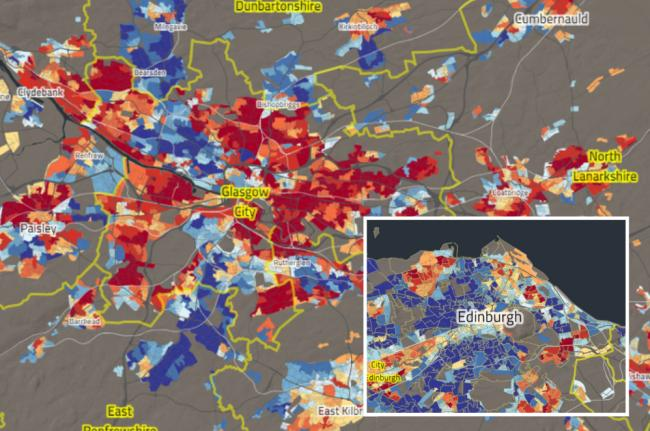

Our dataset contains only those datazones that are in either Edinburgh or Glasgow. For each datazone we have variable columns corresponding to the following:

1. `datazone` - This is a code identifying each datazone
2. `city` - Whether the datazone is in the cities of Edinburgh or Glasgow
3. `retailer_count` - A count of the total number of shops and retailers selling tobacco products in each datazone
4. `total_population` - A count of the total adult population in each datazone
5. `retailer_per_10000` - The number of retailers per 10000 population 
6. `income_rank` - A number indicating the rank of each datazone according to the degree of income deprivation with 1 being the most income deprived and 6976 being the least. This variable is derived from the number of people on low incomes.
7. `health_rank` - Same as above but ranking according to health deprivation based on numbers of hospitalisations.

We are going to look at these various variables to help us answer our research question.

Now let's create some plots with this new data. In the previous practical we learnt some basic graphing commands. This week, we are going to learn some more advanced but much more useful commands, based on the `ggplot()` command. `ggplot()` is famous among data scientists and analysts for the huge range of graphs and plots that it can produce and the relative ease with which they can be created. It works on a principle of layers, where a plot is built up layer by layer. This allows more complex plots to be produced step by step. 

Later on in the practical we are going to carry out correlation and regression analysis. But the first step in is almost always to produce  scatter plot. Let's remind ourselves of our overall research question; **Do more deprived areas of Scotland have greater access to tobbaco products?**. Remember the equation for a straight line:

**y = m * x + c**

For our research question, deprivation (either health or income deprivation) is our predictor variable (our `x` in the  equation above) and retailer_per_10000 is our `y`.

A basic scatter plot can be drawn using `ggplot()` with the code below:

`ggplot(TobaccoDeprivation, aes(income_rank, retailer_per_10000)) + geom_point()`

Run this now, and then we will deconstruct the code and its different parts.

Let's deconstruct this code in more detail, particularly the bit in the `ggplot` brackets. The first part should be clear, it is where we specify the data object to be used, in this case `TobaccoDeprivation`. The next part contains the letters `aes`. In `ggplot` `aes` stands for *aesthetics* and is where you specify how the graph will look and is where you specify which variables you wish to plot. Hence with the `aes` brackets we first put the x variable (`income_rank`) followed by the y variable (`retailer_per_1000`). We then close off these brackets. 

The next part `+ geom_line()` is where you specify the type of graph to be drawn. In `ggplot`, `geom` means geometry so this command is saying the **geometry of this graph should be a line**. 

`ggplot` has many many different `geoms` that it can use. If you are interested, take a look at the full list here: https://ggplot2.tidyverse.org/reference/

Some of the more common ones you will use most often are:

- `geom_bar()` - Line graph
- `geom_point()`- Scatter graph
- `geom_smooth()` - Creates a smoothed line (more on this below to create a line of best fit!)
- `geom_histogram()` - Histogram
- `geom_boxplot()` - Boxplot

One thing to note is that there are two sets of closed brackets here at the end of the command. This is because we have to **close off** each function with a closing bracket so that the open and close brackets all add up. This can be a little confusing, so jupyter has a neat trick so make sure you incude all of the brackets you need. To see this, after you have pasted the command into the code cell, move the typing cursor along the command. When it gets to a bracket, the bracket should turn a green colour along with the corresponding bracket opening and closing bracket to which it relates. This can help you identify which open brackets go with which closed brackets. This is very helpful if you need to add or remove any brackets to your code. Too many or too few brackets and the command will not run!

Where `ggplot()` really shines is its abillity to build plots layer by layer. Let's illustrate this. Run the code below:

`graph <- ggplot(TobaccoDeprivation, aes(income_rank, retailer_per_10000))`


This command should not produce any output. Why? 

Because if you look closely at the code, we have added `graph <-` to the command. 

If you remember from the previous practical, `<-` is an assignment operator. When we used this before, we used it to assign data to an object. But we can do exactly the same thing with a graph (in fact with anything in R). 

In other words, we have asigned the graph to an object called `graph`(we could call it anything we wanted though, think of it like a codename!). To see the graph, we just type the name of the object. Do this in the cell below, e.g. just type `graph`.

You should see that it has produced a blank graph with only axis labels and scales included. This is because in the original graph we didnt specify a *type* of graph e.g. a `geom_point()`. But, we can add this to our existing graph object really easily  with the following code:

`graph + geom_point()`

Hopefully you can see what is going on here. This command basically says "take the existing `graph` object, and add a line graph to it. In other words it is *updating* the *existing graph object* with this new command.  Run the code to see this.

This is a hugely powerful aspect of `ggplot()` and R in general because it allows us to produce lots of different graphs very quickly whilst also keeping formatting and other things consistent between them. 

Of course, using the assignment operator we can also put the updated graphs we create into new objects. e.g. 

`scatter_income <- graph + geom_point()`

Remember, because we are using the assignment operator `<-` this code wont produce any output but it will put the graph into a new object called `scatter_income`. To see the new graph, we would need to call this new object by calling `scatter_income`. 

Run these commands in the cells below.

Of course, one thing we havent done yet with `ggplot` is adding labels and titles etc. This is also easy and is done in a very similar way as adding the graph types. We use the `labs()` command. e.g.

`+ labs(x = "Income Deprivation Rank", y = "Tobacco Retailers (per 10000 population", title = "Scatter of Tobacco Retailers and Income Deprivation")`

This command will add axis labels and a title. Note how each label is separated by a `,` and also how we specify what we want to label with `x=`, `y=`, or `title=`. Finally, take note of how the label text itself always needs to be surrounded by `" "` marks. 

All we need to do is add the code to our existing `scatter_income` graph object. The full code to do this is below. All we are doing is adding all of the above label code to the end of the previous code:

`scatter_income <- graph + geom_point() + labs(x = "Income Deprivation Rank", y = "Tobacco Retailers (per 10000 population", title = "Scatter of Tobacco Retailers and Income Deprivation")`

Run this code and then take a look at the new graph it has produced. Remember to type the name of the graph object in a new cell to view it!

Now, let's generate a new line graph plot for the **health deprivation rank** variable. Remember because we are making a new plot, we have to create a new base graph as well. i.e. we have to include the `ggplot(TobaccoDeprivation, aes(retailer_per_10000, health_rank))`, as below.

`scatter_health <- ggplot(TobaccoDeprivation, aes(retailer_per_10000, health_rank)) + geom_point() + labs(x = "Health Deprivation Rank", y = "Tobacco Retailers (per 10000 population", title = "Scatter of Tobacco Retailers and Health Deprivation")`

Run this code (remembering to type the name of the graph object again to actually view it). When you have created the graph, compare it to the one above. Does it look the same? Do health and income deprivation income have a different relationship with availabillity of tobacco?

There are loads of different options and tools within `ggplot()`, far more than we can cover here. We have covered the basics and more than enough to get you started with plotting in R. If you want to learn more about `ggplot()` there is the reference pages online here: https://ggplot2.tidyverse.org/

This documentation can be quite complex and difficult to follow when you are starting out, so you may want to have a look online for more resources if you want to develop your skills further. A quick google search should bring up lots of options for intro tutorials and videos to help you out. In fact, google is an excellent option when learning a new programming language! Often a good google search to jog your memory is the quickest way to solve the problem (even for experienced programmers)! We dertainly don't expect you to remember all of the commands off the top of your head!   

***
### Exercise 3

**Generate a new scatter graph plot for the *retailer_count* variable (NOT the retailer_per_10000 variable!) against the *income_rank* variable. Use `ggplot()` and the various methods you used above. Remember to add informative labels for the axes and title.** 

**CODE HINT: Remember the basic code for `ggplot()`, where you first specify the data and then use `aes()` to specify the variables. You can use `geom_point()` to specify the type of graph. Also remember the variable names are `retailer_count` and either `income_rank` or `health_rank`.**
***





To create a scatter graph for the retailer_count variable and income_rank, use: 

`ggplot(TobaccoDeprivation, aes(income_rank, retailer_count)) + geom_point() + labs(x = "Income Deprivation Rank", y = "Tobacco Retailers (count)", title = "Scatter of Count of Tobacco Retailers and Income Deprivation")`

**End of solution**

***

An important thing we can do with a scatterplot is add a linear best-fit line. This is really important in the context of regression analysis. Adding a line of best fit to a plot with `ggplot()` is really easy and is another reason why it is such a great command within the R system. Let's do this with our original **scatter_income** plot. All we have to do is take our existing **scatter_income** object and effectively add another plot in the same way we have been adding anything else to our plot i.e. with the `+`. In this case we need to use `geom_smooth()` which will add a "smoothed" or in our case a best fitting line to our scatterplot. The bit we need to add is:

`+ geom_smooth(method = 'lm')`

And so to add this to our existing graph object, we just need:

`scatter_income <- scatter_income + geom_smooth(method = 'lm')`

Before you run this code you might be thinking what the bit in the brackets means i.e. the `method = lm` part. This is telling R what type of smoothed line you wish to add. Here, "lm" means "linear model" in other words a **straight** line. If you remember back to fundamental methods, you might remember we looked at **non-linear** lines in the tree data that you collected in the forest. We can easily produce these in R as well using different methods in `geom_smooth()` such as for example `method = 'loess'`. This will produce a non-linear line instead of a straight line ("loess" is just name for a type of non-linear line). We are not going to be dealing with non-linear lines in this course but it is useful to see the difference. Produce both types of graph using the code below to see the different types:

`scatter_linear <- scatter_income + geom_smooth(method = 'lm')`

`scatter_loess <- scatter_income + geom_smooth(method = 'loess')` 

`scatter_loess` 

`scatter_linear` 

Run all of the code above in the same cell below to see the result...

Look at both of these graphs. Try and think about the interpretation of both and how they are different? Before we move on to the formal regression analysis, have a think about how the bottom graph will translate into numerical values for the slope of the line and intercept (i.e. the values of **m** and **c** in the equation of a straight line, **y=mx+c**). Write down a best guess of what these values might be by looking at the graph. Ask a demonstrator for help if you are not sure!

Also, have a best guess of the likely correlation value and write this down. 

You can see how close your guesses are to the true values when we calculate it in the next sections!

***

## Part 4: Correlation


We have a sense of the relationship between tobacco retailers and deprivation from the scatterplots, but now it is time to anayse this relationship statistically using the pearson correlation.

This is easy to do using the `cor.test()` command. The code below shows you how to do this:

`cor.test(TobaccoDeprivation$retailer_per_10000, TobaccoDeprivation$income_rank, method="pearson")`

Let's look at this command in detail. 

1. The first two items in the brackets are the two variables we wish to correlate. They are specified using the `$` convention we saw in last weeks practical. i.e. `TobaccoDeprivation$retailer_per_10000` means "use the retailer_per_10000 variable from the TobaccoDeprivation data". 
2. The second part is where we specify the correlation method we want to use, in this case we are are calculating pearson correlation.

Run this code in the cell below and then we will analyse the result.

This is a lot of information! For now, focus on the last 3 lines: the Pearson’s r, which is labelled as "cor". This indicates that the correlation strength is 0.02 (rounded to 2 decimal places). Two things to note about this number: it is very low (refer to your lecture notes regarding what constitutes a low correlation), and it is positive. Recall the scatter plot we produced earlier – was it consistent with a positive low correlation value? When you guessed the correlation earlier, how close did you get?


***
## Exercise 4

Now find the correlation between retailer_per_10000  and health_rank. What is the Pearson’s r value? Is it still positive? Is it stronger? Is this consistent with the scatter plots you produced?


Hint: Use the `cor.test()` and remember the `$` when specifying the variables within the TobaccoDeprivation dataset. Also remember the `method="pearson")`part as well.


To calculate the correlation between retailer rate and inome deprivation rank use:

`cor.test(TobaccoDeprivation$retailer_per_10000, TobaccoDeprivation$health_rank, method="pearson")`

**End of solution**

***
Now, instead, find the correlation between retailer_per_10000 and income_rank again, but this time select Spearman rank-order as the Type of Correlation. 

`cor.test(TobaccoDeprivation$retailer_per_10000, TobaccoDeprivation$income_rank, method="spearman")`

Note how we have changed the `method=` part in the code. 

You can ignore the error message that appears, it is not important at this stage. This correlation test is necessary when one or both of the data sets involved is found to be strongly non-normally distributed. (We will discuss how to test for this next week.) Spearman’s rank is suitable for ordinal data, unlike Pearson’s, and is more commonly used in Human geography. The value should be similar, but not the same, as Pearson’s r. Similar values for both tests is quite typical of real-world data.

***
## Part 4: Regression analysis

In Part 2, you generated a best-fit line for the scatterplot, but we do not yet know the Equation of the line (i.e. y = mx + c), or its R2 value, which gives an indication of the strength of the fit. For this, we need to do a formal regression analysis. Remember, we want to predict Retailer Rates as a response to deprivation. It is a very different question than if we chose Retailer Rates as the Explanatory Variable and deprivation as the Response Variable – do you see the difference?

Let's get on with carrying out our regression analysis. Linear regression analysis is carried out using the `lm()` command which stands for "linear model". The code to implement this model is below:

`regression_results <- lm(formula = retailer_per_10000 ~ income_rank, data = TobaccoDeprivation)`

Let's deconstruct this code further:

1. Hopefully by now you can recognise the `<-` symbol, but you may be wondering why it is being used here? As you may be starting to realise, almost everything in R can be named as an object (e.g. data and graphs) and this applies to the output from various commands incuding regression. In this case we are going to store the results of the regression in an object called `regression_results`. To view these results we can use the `summary()` function.
2. The rest of the `lm()` command should be fairly clear. First we specify the formula for the regression using the `formula =` code. 
3. After the `=` sign we specify the variable to be predicted (i.e. the y variable) followed by the variable we wish to use as the predictor (i.e. the x variable). 
4. You'll notice that instead of an "=" symbol R uses a `~` symbol. This is because, as you have seen, the "=" symbol is used for a different purpose in R (and in programming in general) and we need to differentiate between the two uses by using a different symbol. 
5. The last part of the code is where we specify the data with `data = `. 

First run the regression code (from above) to store the results, and then run:

`summary(regression_results)`

to display them.

Your output should look something like the image below (minus the red lines!):

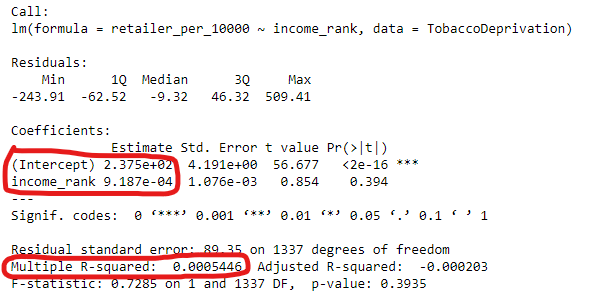

Again, this is a lot of output to digest! But for the purpose of this practical, you just need to look at three things, 	labelled above: The **Intercept**, the **Slope** (referred to as the income_rank Coefficient), and the **R2**, or coefficient of variation (referred to above as the Multiple R-squared). 

Lets' start with the slope and intercept values. One thing you will notice is that the numbers have `e+02` written after them. Remember back to fundamental methods, this is simply to shorten the number to make it more readable. The number after the plus sign means the number of decimal places. So `2.375e+02` means `237.5` and `9.187e-04` means `0.009187`.

Go and have another look at the scatter plots you produced earlier and look at your guesses for these values and see how close you were. Try and think about how these numbers in the regression output connect to the visual representation in the scatter plots i.e in terms of the **y = m x + c** formula for a straight line. 

As we discussed in lecture the hugely powerful thing about regression is its abillity to make **predictions**. We can do this ourselves by substituting our values from above into the **y = m * x + c** formula. This gives us the equation for the best-fit line specific to the analysis we have just completed. It looks like the below:

**Tobacco retailer Rate = 0.009187 x income rank - 237.5** 

We can use this formula to make our predictions by predicting a value of tobacco retailer rate given a known value of income deprivation rank. 

From the formula above, what is the predicted Tobacco retailer Rate if the income rank of an area is 1000? What about if it was 2000? To calculate these we just need to substitute the values into the formula above. To do these calculations you can use a calculator but this is a good opportunity to highlight that R can be used as a calculator using the `/ * + -` symbols. 

So, to predict the Tobbacco retailer rate with an income deprivation rank of 1000 you would paste the following into the code cell:

`237.5+(0.009187*1000)`

To predict with income deprivation rank of 2000, you would do:

`237.5+(0.009187*2000)`

As you can see, as datazone deprivation rank increases (i.e. as a place gets less deprived) its number of retailers increases.

The R2 from our regression is 0.0139. This is not a strong fit – it means only 1.4% of the variation (i.e. the scatter in the points!) in retailer rate is explained by income deprivation rank. What other things might explain the other 98.6% of the variation?

***
## Exercise 5: This one is quite advanced...

Using some of the things you learned from last week (you may want to have last weeks notebook open to remind you and to refer to!), create two new subset datasets, one for Glasgow and one for Edinburgh. Name them `glasgow` and `edinburgh`. 

With each dataset, find the pearson correlation between retailers per 10000 people and income deprivation rank. Compare the correlations.

Now do the same but this time do a regression analysis for both Edinburgh and Glasgow for the same variables (remember that retailers per 10000 is the y variable and income deprivation rank is the x variable for each new dataset. Again, compare the two results.

Reflect on the analysis and what it is showing. Are there geographical differences apparent in the relationship between deprivation and availabillity of tobacco products? 

HINT: You'll need the `filter()`, `cor.test()` and `lm()` commands for all of this! Remember the answers are below if you get stuck...

***

**Answers: This exercise has many steps! In order:**

a. To create the new datasets use: 

`glasgow <- filter(TobaccoDeprivation, city == "Glasgow")`

`edinburgh <- filter(TobaccoDeprivation, city == "Edinburgh")`

b. To calculate the correlation between retailer rate and income deprivation rank for each city, use:

`cor.test(glasgow$retailer_per_10000, glasgow$income_rank, method = "pearson")`

`cor.test(edinburgh$retailer_per_10000, edinburgh$income_rank, method = "pearson")`

c. To calculate the regression analysis predicting retailer rate with income deprivation in each city: 

`glasgow_model <- lm(formula = retailer_per_10000 ~ income_rank, data = glasgow)` and then run `summary(glasgow_model)`

`edinburgh_model <- lm(formula = retailer_per_10000 ~ income_rank, data = edinburgh)` and then run `summary(edinburgh_model)`
